# Lending Club case study ML CS54

#### We have done this study in following steps
    1. Data Understanding
    2. Data Cleaning
    3. Data Analysis
    4. Recommendations


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("loan.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\siz71\AppData\Local\Temp\ipykernel_9948\823838075.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv", sep=",")


In [78]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [79]:
loan.shape

(39717, 111)

In [80]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [81]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [82]:
 #Running the query TO identify what percentage of values are nulls in each column
loan.isnull().sum()/len(loan.index)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [83]:
#Listing all columns which have 90% of the values as nulls into missing_columns list
missing_columns= loan.columns[loan.isnull().sum()/len(loan.index)*100>90]

In [84]:
#Dropping the columns which have 90% of the values as nulls
loan = loan.drop(missing_columns, axis=1)


In [85]:
print(loan.shape)

(39717, 55)


In [86]:
 #Again running the query to on columns identify what percentage of values are null
loan.isnull().sum()/len(loan.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [87]:
loan.loc[:,['desc','mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


The two columns 'desc','mths_since_last_delinq' have 32% and 64% of null values in them respectively. 
"desc" is the comments or reason the borrower provides while requesting the loan, which is in free text format. We can analyze it for some insights but we chose not to do so in our current study to keep it simple.
"mths_since_last_delinq" represents 'The number of months since the borrower's last delinquency'. Since this information will not be available at the time of loan application we cannot use this to identify potential defaulters.
So we are going to drop these two columns from our study.

In [88]:
# dropping the two columns 'desc', 'mths_since_last_delinq'
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [89]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [90]:
#couting unique values in each column excluding the NA values
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [91]:
#Listing all columns which have only one value into singlevalue_columns list
singlevalue_columns=loan.columns[loan.nunique()==1]

In [92]:
print(singlevalue_columns)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [93]:
#Dropping the columns which only one value since we cannot make any insights for our current case study. 
#Manually checked the values in these columns they contain either a single value or NA or 0/1. 
#so we can safely assume that dropping these columns will not impact our analysis
loan = loan.drop(singlevalue_columns, axis=1)

In [94]:
print(loan.shape)
#we now have 46 columns left

(39717, 44)


In [95]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [96]:
loan.loc[:,['url','title','zip_code','addr_state']].head()

,url,title,zip_code,addr_state
0,https://lendingclub.com/browse/loanDetail.acti...,Computer,860xx,AZ
1,https://lendingclub.com/browse/loanDetail.acti...,bike,309xx,GA
2,https://lendingclub.com/browse/loanDetail.acti...,real estate business,606xx,IL
3,https://lendingclub.com/browse/loanDetail.acti...,personel,917xx,CA
4,https://lendingclub.com/browse/loanDetail.acti...,Personal,972xx,OR


These 4 columns 'url','title','zip_code','addr_state' have details which are either masked or redundant. for example information in "title" column is almost similar to what is available in "purpose" column. information in "zip_code" is partially masked. 
So we are dropping off these columns as well.  

In [97]:
# dropping these columns 
loan = loan.drop(['url','title','zip_code','addr_state'], axis=1)

In [98]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [99]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [100]:
# The column int_rate is character type, we will convert it into float
loan['int_rate'] = loan['int_rate'].apply(lambda x:pd.to_numeric(x.split("%")[0]))

In [101]:
# checking the data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [102]:
# We will extract numeric part from the variable employment length

# first dropping the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [103]:
# looking at type of the columns again
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38642 non-null  int64  
 1   member_id                38642 non-null  int64  
 2   loan_amnt                38642 non-null  int64  
 3   funded_amnt              38642 non-null  int64  
 4   funded_amnt_inv          38642 non-null  float64
 5   term                     38642 non-null  object 
 6   int_rate                 38642 non-null  float64
 7   installment              38642 non-null  float64
 8   grade                    38642 non-null  object 
 9   sub_grade                38642 non-null  object 
 10  emp_title                37202 non-null  object 
 11  emp_length               38642 non-null  int64  
 12  home_ownership           38642 non-null  object 
 13  annual_inc               38642 non-null  float64
 14  verification_status   

## Data Analysis

To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. 

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

Thus, going forward, we will use only the other two types of variables.

In [104]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [105]:
# let's now remove the behaviour variables from analysis
df = loan.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  int64  
 3   funded_amnt           38642 non-null  int64  
 4   funded_amnt_inv       38642 non-null  float64
 5   term                  38642 non-null  object 
 6   int_rate              38642 non-null  float64
 7   installment           38642 non-null  float64
 8   grade                 38642 non-null  object 
 9   sub_grade             38642 non-null  object 
 10  emp_title             37202 non-null  object 
 11  emp_length            38642 non-null  int64  
 12  home_ownership        38642 non-null  object 
 13  annual_inc            38642 non-null  float64
 14  verification_status   38642 non-null  object 
 15  issue_d            

In [106]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

We can see that most of the loans are fuly paid. The ones marked 'current' are neither fully paid not defaulted,so we will get rid of these since they cannot provide us information on defaulters. 
Let's tag the fully paid loands as 1 and defaulters as 0.

In [107]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   member_id             37544 non-null  int64  
 2   loan_amnt             37544 non-null  int64  
 3   funded_amnt           37544 non-null  int64  
 4   funded_amnt_inv       37544 non-null  float64
 5   term                  37544 non-null  object 
 6   int_rate              37544 non-null  float64
 7   installment           37544 non-null  float64
 8   grade                 37544 non-null  object 
 9   sub_grade             37544 non-null  object 
 10  emp_title             36136 non-null  object 
 11  emp_length            37544 non-null  int64  
 12  home_ownership        37544 non-null  object 
 13  annual_inc            37544 non-null  float64
 14  verification_status   37544 non-null  object 
 15  issue_d            

<Axes: >

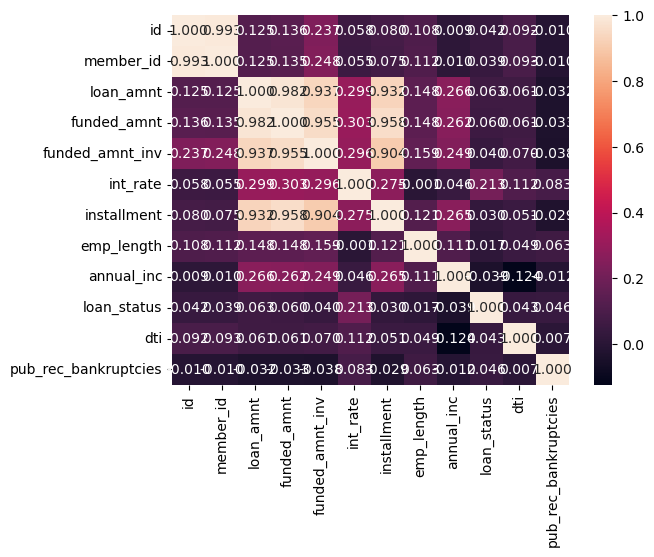

In [109]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f")


Now we will start Univariate Analysis

## Univariate Analysis

First, let's look at the overall default rate.


In [110]:
# we will drop id and member_id columns since they are unique identifiers for identfying the loan and borrowers.
#This is not required for our analysis
loan.loc[:,['id','member_id']].head()

,id,member_id
0,1077501,1296599
1,1077430,1314167
2,1077175,1313524
3,1076863,1277178
4,1075358,1311748


In [111]:
# dropping these columns 
loan = loan.drop(['id','member_id'], axis=1)

In [112]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38642 non-null  int64  
 1   funded_amnt              38642 non-null  int64  
 2   funded_amnt_inv          38642 non-null  float64
 3   term                     38642 non-null  object 
 4   int_rate                 38642 non-null  float64
 5   installment              38642 non-null  float64
 6   grade                    38642 non-null  object 
 7   sub_grade                38642 non-null  object 
 8   emp_title                37202 non-null  object 
 9   emp_length               38642 non-null  int64  
 10  home_ownership           38642 non-null  object 
 11  annual_inc               38642 non-null  float64
 12  verification_status      38642 non-null  object 
 13  issue_d                  38642 non-null  object 
 14  loan_status           

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

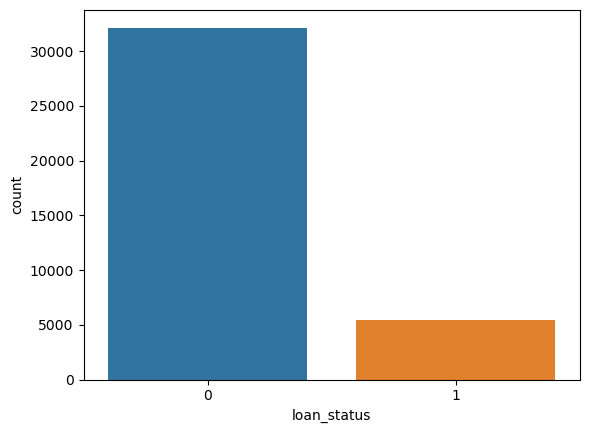

In [115]:
#Doing univariate analysis on loan status variable
sns.countplot(x=df['loan_status'])

We find from above plot that ratio of defaulters is less compared to those who don't.

In [116]:
df['grade'].value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

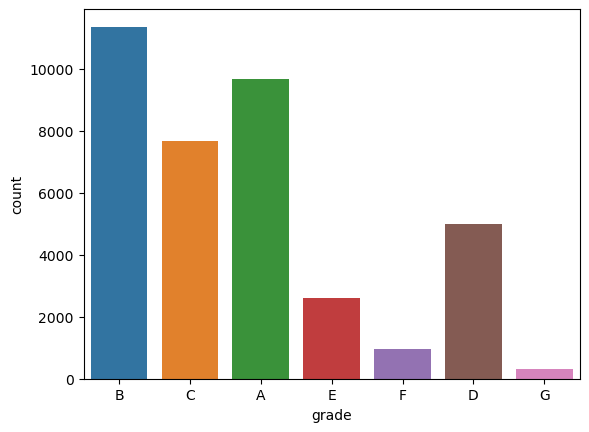

In [117]:
sns.countplot(x=df['grade'])

In [118]:
df['loan_amnt']

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 37544, dtype: int64

<Axes: xlabel='loan_amnt', ylabel='Density'>

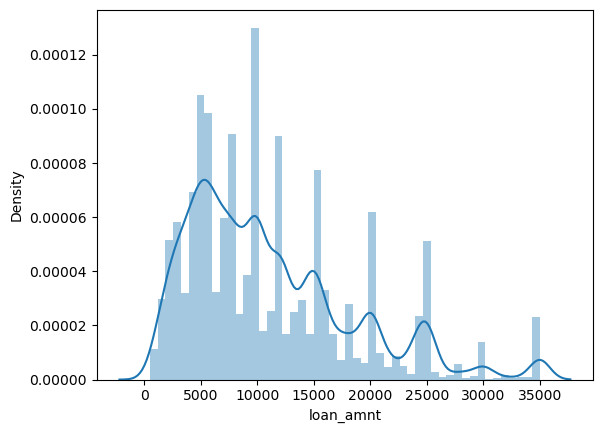

In [119]:
sns.distplot(df['loan_amnt'])

From above plot we can find that 10000 is most common loan amount.

<Axes: xlabel='loan_amnt'>

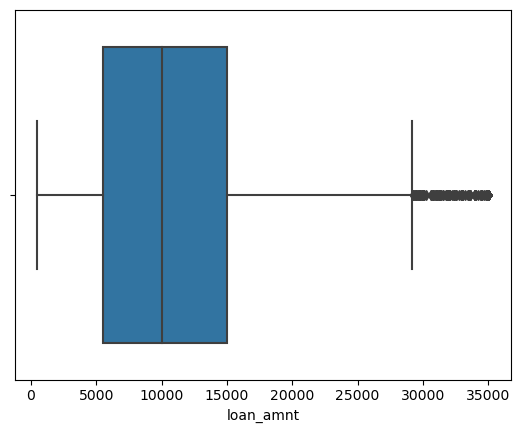

In [120]:
sns.boxplot(x=df['loan_amnt'])

From above box plot, we find that top and bottom quartiles of loan amount belong to range 5000 and 15000 and the median lies at 10000.

<Axes: xlabel='int_rate', ylabel='Density'>

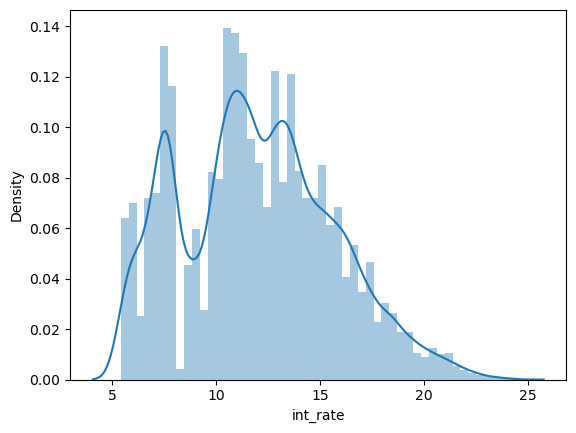

In [121]:
sns.distplot(df['int_rate'])

<Axes: xlabel='int_rate'>

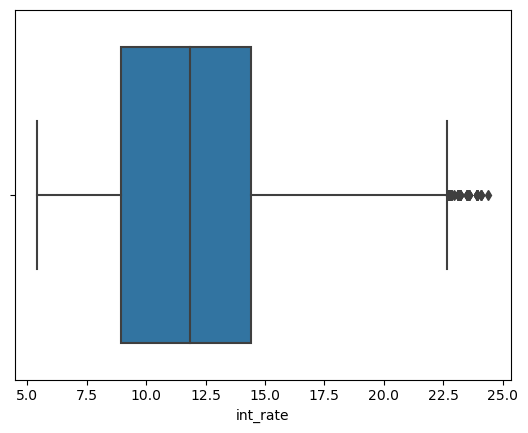

In [122]:
sns.boxplot(x=df['int_rate'])

From above box plot, we find that top and bottom quartiles of interest rate belong to range 9 and 14 and the median lies at around 12.

<Axes: xlabel='loan_status', ylabel='int_rate'>

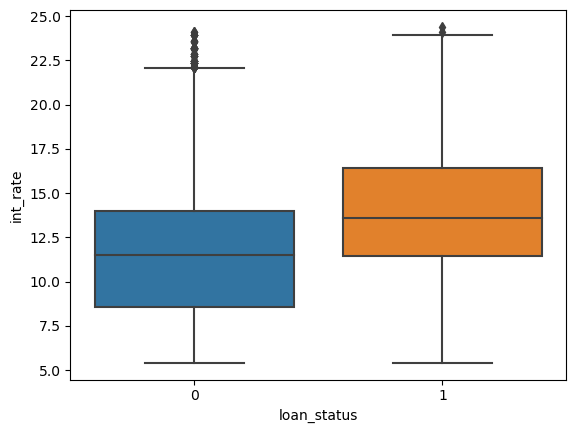

In [123]:
#Analyze the relationship between loan status and int_rate
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=df)

From above box plot we find that higher interest rate leads to more probability for defaulting of loan.
We find that median, first and third quartiles are higher for defaulters.

<Axes: xlabel='loan_status', ylabel='annual_inc'>

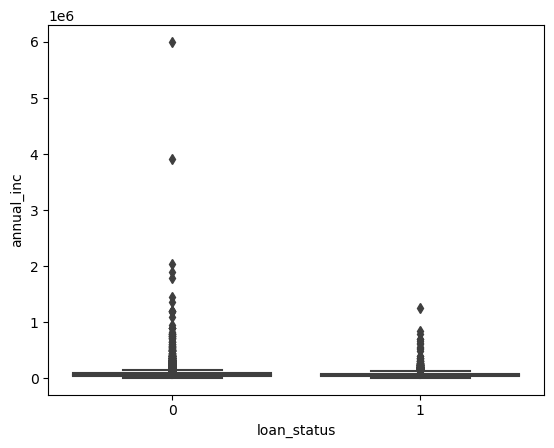

In [124]:
#Analyze the relationship between loan status and salary
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=df)

Since the above plot is not giving clear view, we will reduce the range for plotting. <br> We will consider rows where the annual salary is lessthan 10000.

<Axes: xlabel='loan_status', ylabel='annual_inc'>

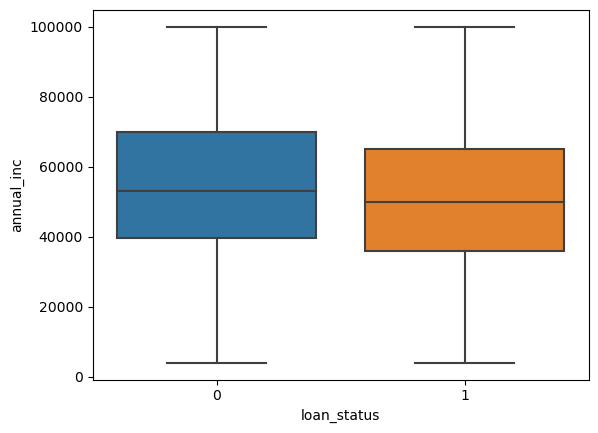

In [125]:
temp = df[df['annual_inc'] < 100000]
#Analyze the relationship between loan status and salary
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=temp)

We see from the above plot that lower annual income has higher probability to defaulting.

In [126]:
# default rate
round(np.mean(df['loan_status']), 2)

0.14

The overall default rate is about 14%.

Let's first visualise the average default rates across categorical variables.

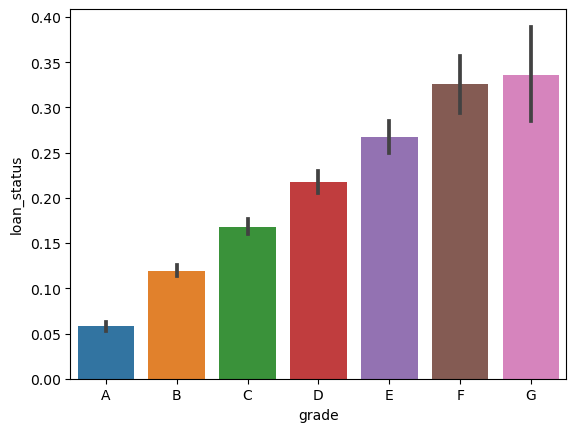

In [127]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df, order=['A','B','C','D','E','F','G'])
plt.show()

As we can see from the above bar plot, the probability of a loan default increases with grade of loan. Loans of grade A have a lower chance of default while loans of grade G have a high chance of default. <br>This is expected because the grade of loan is given based on the riskiness of the loan by Lending Club.

In [128]:
# We will now define a function to plot loan status for different categorical variables

def plot_cat_val(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()
    

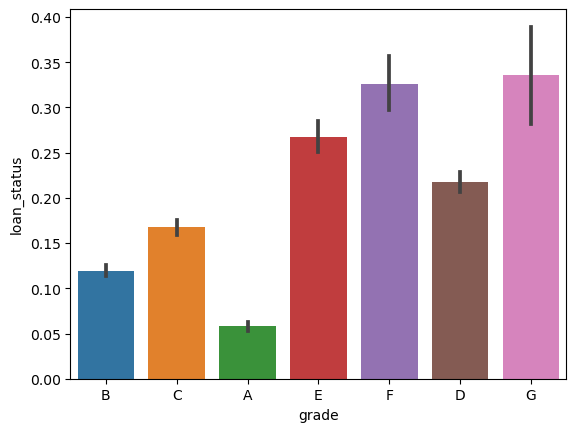

In [129]:
plot_cat_val('grade')

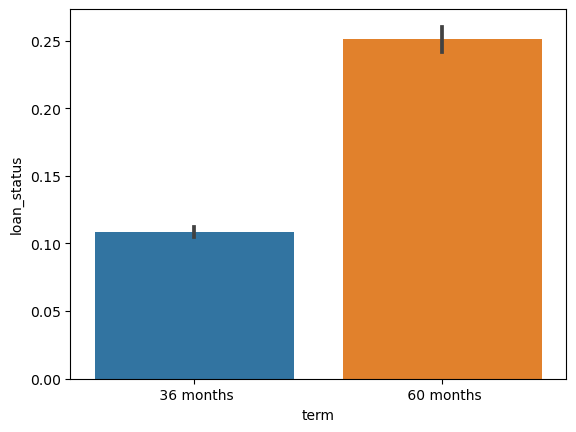

In [130]:
plot_cat_val('term')

From the above plot we can see that loans with 60 months term have a higher chance of defaulting than 36 months.

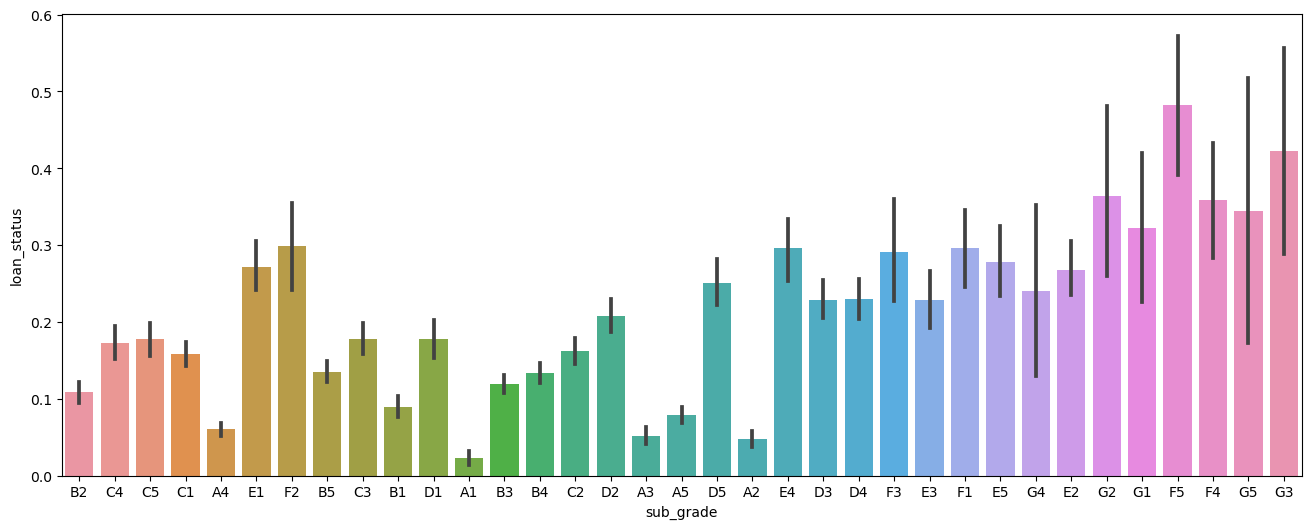

In [131]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
plot_cat_val('sub_grade')

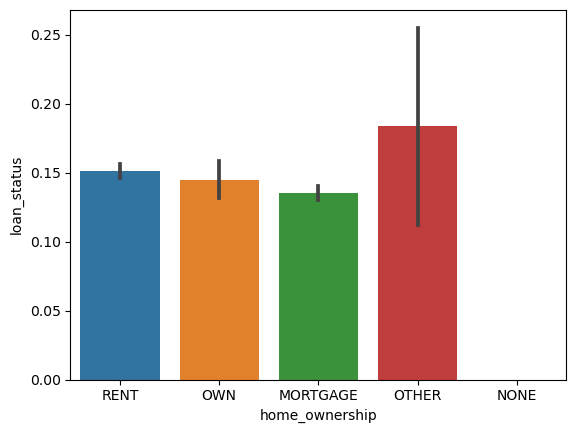

In [132]:
# Home ownership is not a major discriminator in pointing to defaulting
plot_cat_val('home_ownership')

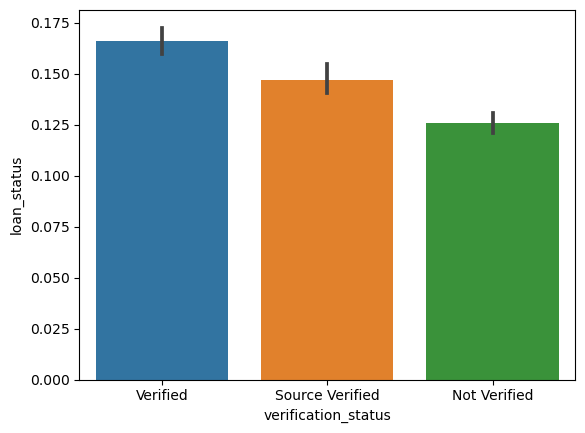

In [133]:
# Below plot shows that Verified loans have a higher probability of default compared to other verification status. 
plot_cat_val('verification_status')

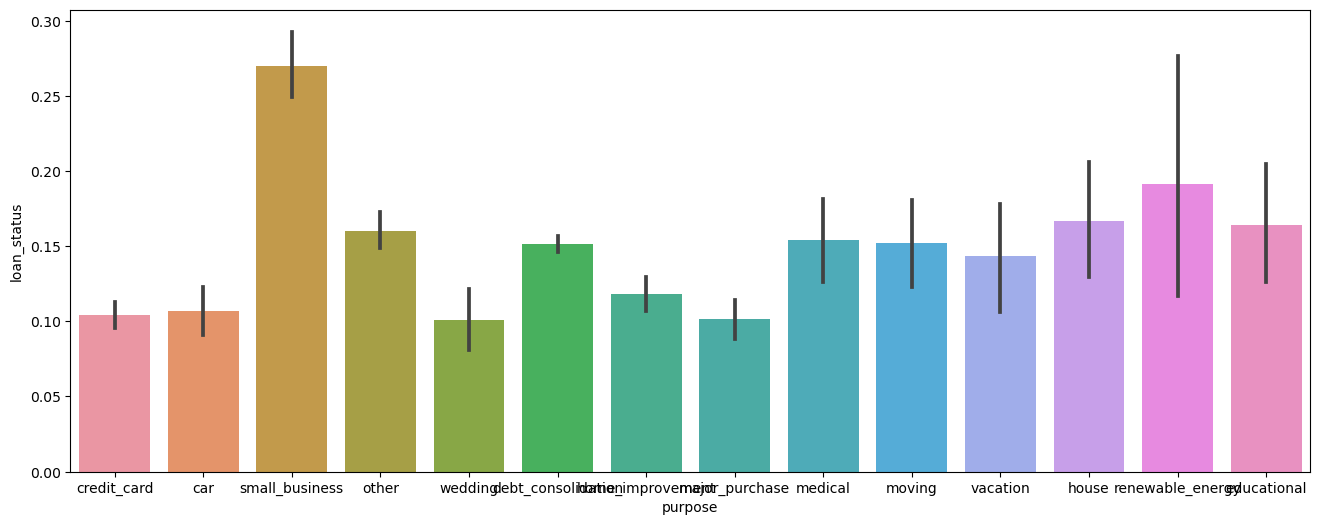

In [134]:
# small business loans have a higher chance default followed by renewable energy and education compared to others
plt.figure(figsize=(16, 6))
plot_cat_val('purpose')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   member_id             37544 non-null  int64  
 2   loan_amnt             37544 non-null  int64  
 3   funded_amnt           37544 non-null  int64  
 4   funded_amnt_inv       37544 non-null  float64
 5   term                  37544 non-null  object 
 6   int_rate              37544 non-null  float64
 7   installment           37544 non-null  float64
 8   grade                 37544 non-null  object 
 9   sub_grade             37544 non-null  object 
 10  emp_title             36136 non-null  object 
 11  emp_length            37544 non-null  int64  
 12  home_ownership        37544 non-null  object 
 13  annual_inc            37544 non-null  float64
 14  verification_status   37544 non-null  object 
 15  issue_d            

In [136]:
# dti, do not show any particular pattern for default 
df.nunique()

id                      37544
member_id               37544
loan_amnt                 866
funded_amnt              1016
funded_amnt_inv          7945
term                        2
int_rate                  370
installment             14801
grade                       7
sub_grade                  35
emp_title               27982
emp_length                 10
home_ownership              5
annual_inc               5006
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
dti                      2848
pub_rec_bankruptcies        3
dtype: int64

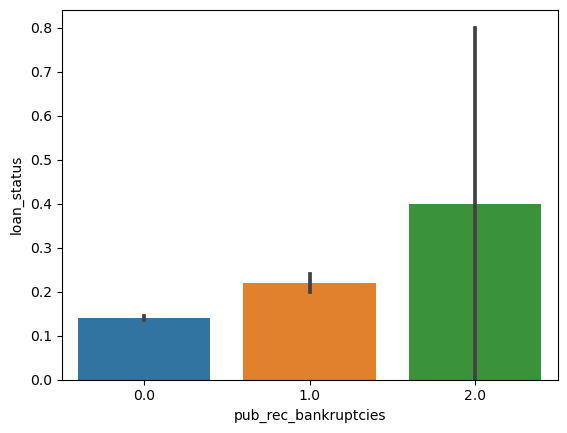

In [137]:
#Public Record of Bankrupticies: Higher bankrupticies shows a higher probability of default.
plot_cat_val('pub_rec_bankruptcies')

Let's now analyse how the default rate varies across continuous variables.


The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [138]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [139]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

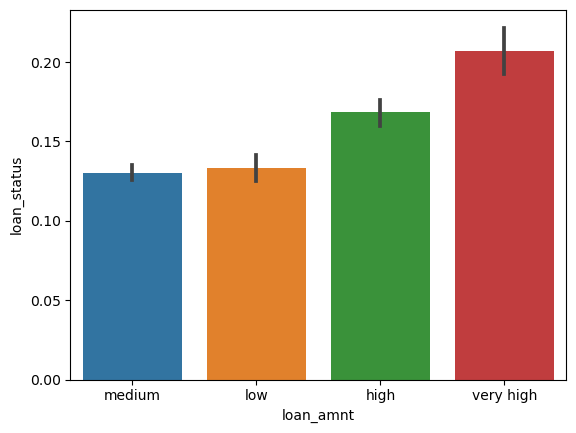

In [140]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_cat_val('loan_amnt')

In [141]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

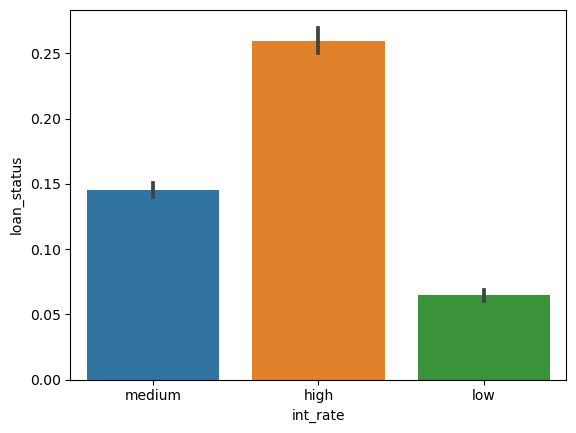

In [142]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_cat_val('int_rate')

In [143]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

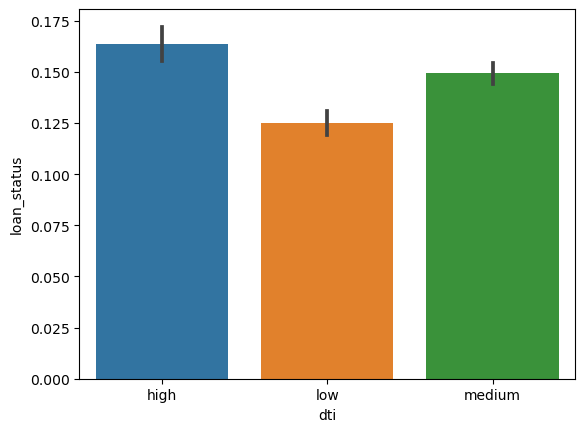

In [144]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_cat_val('dti')

In [145]:
# installment
def installment_amt(x):
    if x<=200:
        return 'low'
    elif x>200 and x<=400:
        return 'medium'
    elif x>400 and x<=600:
        return 'high'
    else:
        return 'very high'

df['installment'] = df['installment'].apply(lambda m:installment_amt(m))      

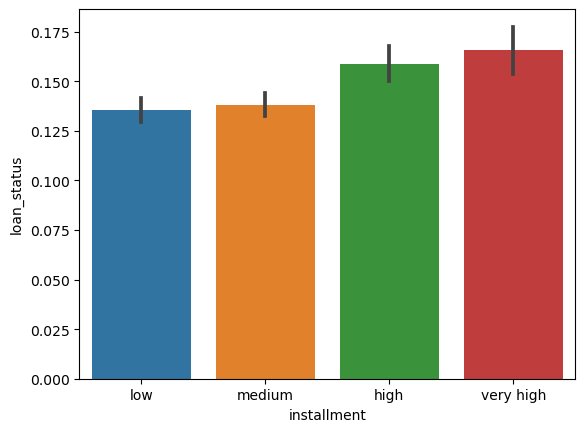

In [146]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_cat_val('installment')

In [147]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

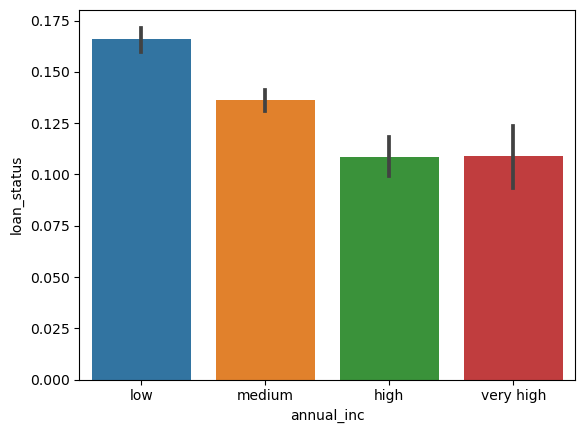

In [148]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_cat_val('annual_inc')

## Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

We will now analyze the effect of various variables on default for different loan purposes. for convinience purpose we will take top 4 loan purposes. 

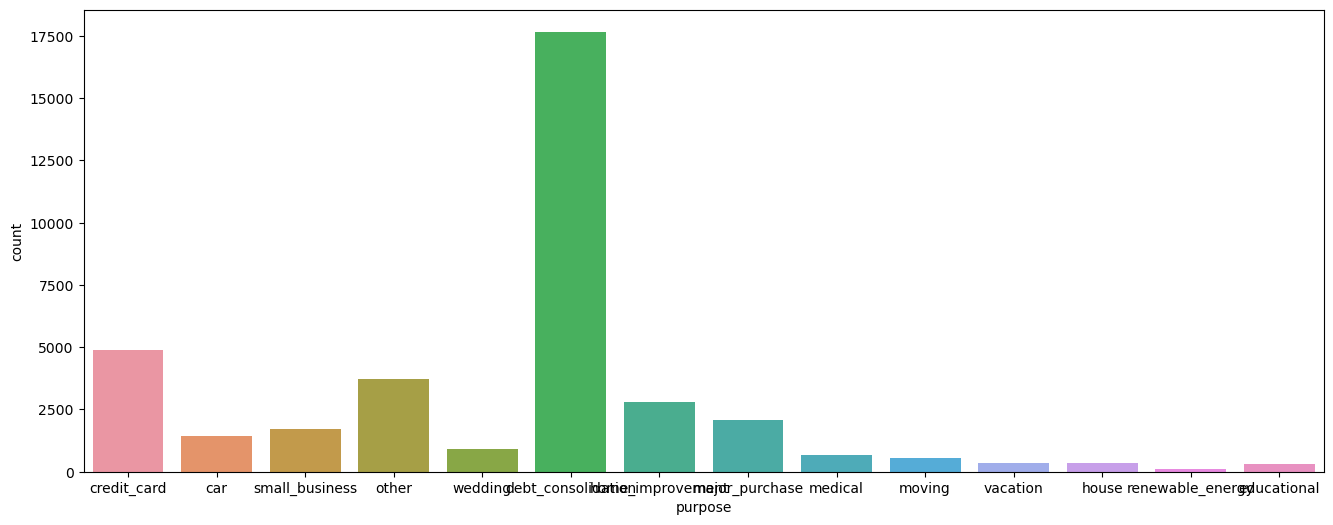

In [149]:
# lets first look at the number of loans for each type (purpose) of the loan
# most common loan purposes are debt consolidation (to repay other debts), then credit card, home_improvement and major purchase (ignoring "other")
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.show()

In [150]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

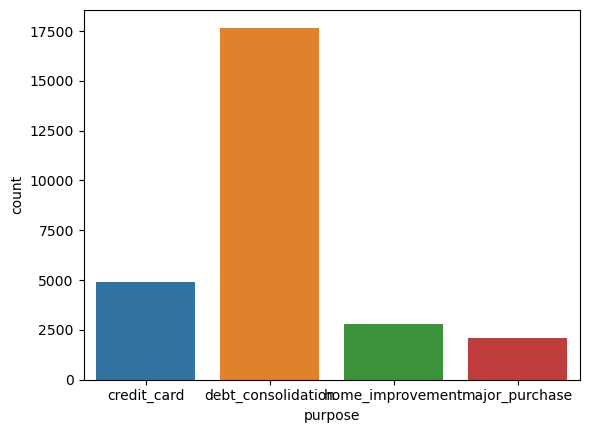

In [151]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

In [152]:
# lets write a function which plots the default rate for a categorical variable and different loan purposes (segmented by purpose)

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()


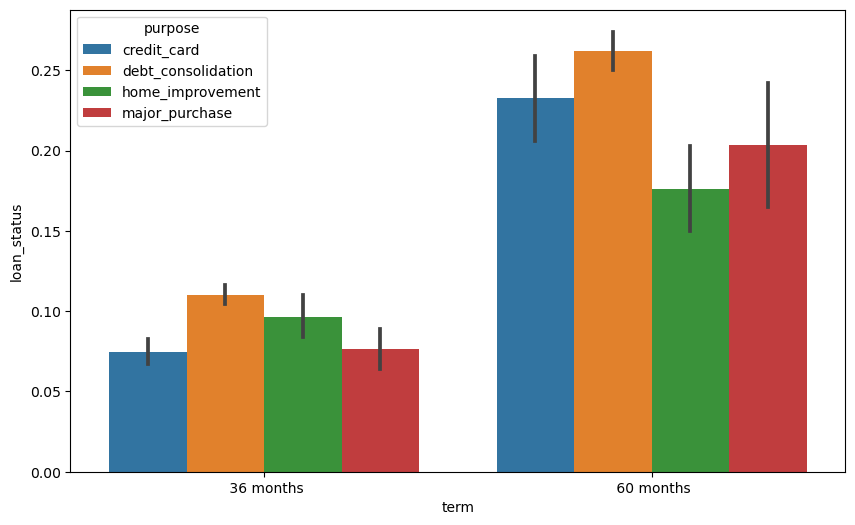

In [153]:
#plotting for term shows that debt consoldation loans default among top loan purposes. 
plot_segmented('term')

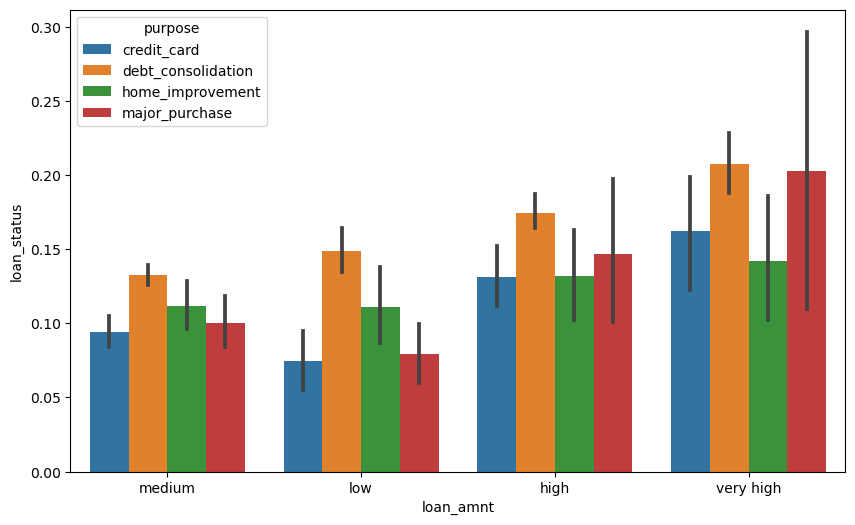

In [154]:
# loan_amnt: same trend across loan purposes.
plot_segmented('loan_amnt')

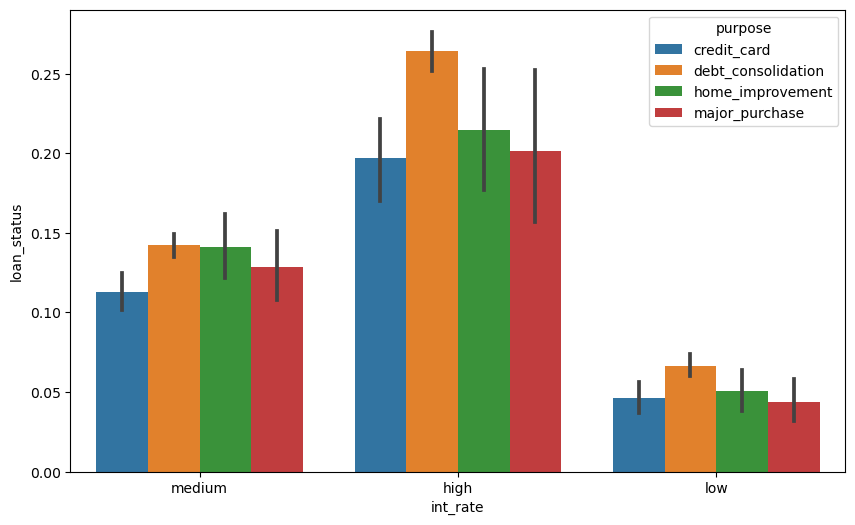

In [155]:
# interest rate: debt consolidation loans with higher interest rate are more probable to default.
plot_segmented('int_rate')

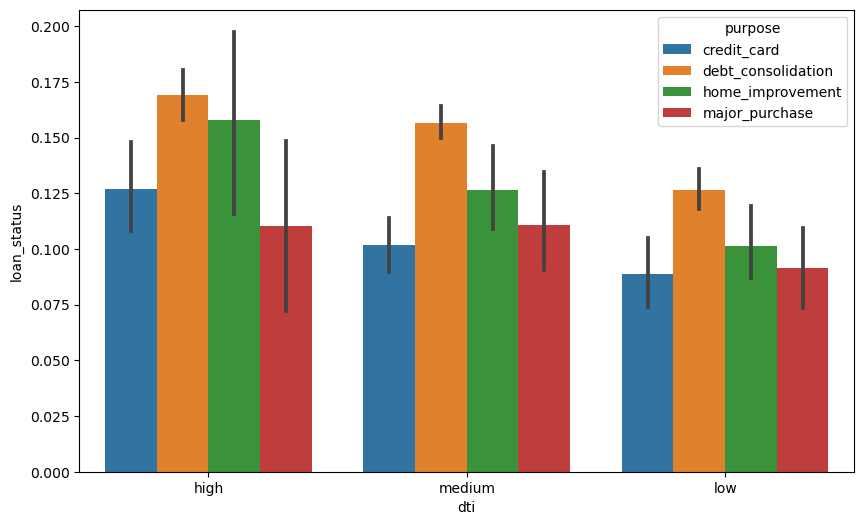

In [156]:
# debt to income ratio:debt consolidation loans with high to medium dti ration are more probable to default.
plot_segmented('dti')